# Data Visualization

Once upon a time there were plots upon plots upon plots.

## Load data

In [1]:
import pandas as pd

df = pd.read_excel('../data/al_atlas_main_results.xlsx', index_col=0).sort_index()

## Main Figures

In [2]:
import sys
sys.path.append('../')
from source.bokeh_plots import *
output_notebook()

plot_linked_scatters(df)

Loading BokehJS ...

## Devise subsets to plot

In [3]:
df_train = df[df['Train-Test'] == 'Train Sample']
df_test = df[df['Train-Test'] == 'Test Sample']

In [4]:
### Select samples from AAML1031, 0531, and 03P1 clinical trials
df1 = df[df['Clinical Trial'].isin(['AAML0531', 'AAML1031', 'AAML03P1'])]

print(
    f'{df.shape[0]-df1.shape[0]} samples were removed. {df1.shape[0]} samples remaining.')

### Select diagnostic samples only
df2 = df1[df1['Sample Type'].isin(
    ['Diagnosis', 'Primary Blood Derived Cancer - Bone Marrow', 'Primary Blood Derived Cancer - Peripheral Blood'])]

print(
    f'{df1.shape[0]-df2.shape[0]} samples were removed. {df2.shape[0]} samples remaining.')

### Remove duplicate samples
df_cog = df2[~df2['Patient_ID'].duplicated(keep='last')]

print(
    f'{df2.shape[0]-df_cog.shape[0]} samples were removed. {df_cog.shape[0]} samples remaining.')


2228 samples were removed. 1281 samples remaining.
332 samples were removed. 949 samples remaining.
9 samples were removed. 940 samples remaining.


In [5]:
# Import Plotting Functions
from source.data_visualization_functions import *

model_name = 'AML Epigenomic Risk'

### Kaplan-Meier Plots

#### Overall study population

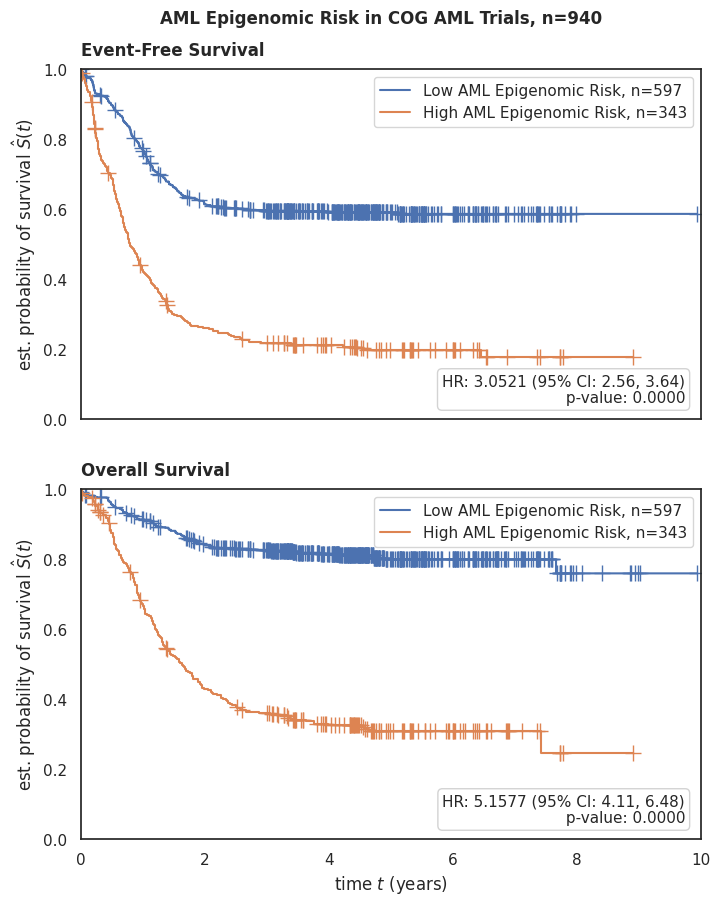

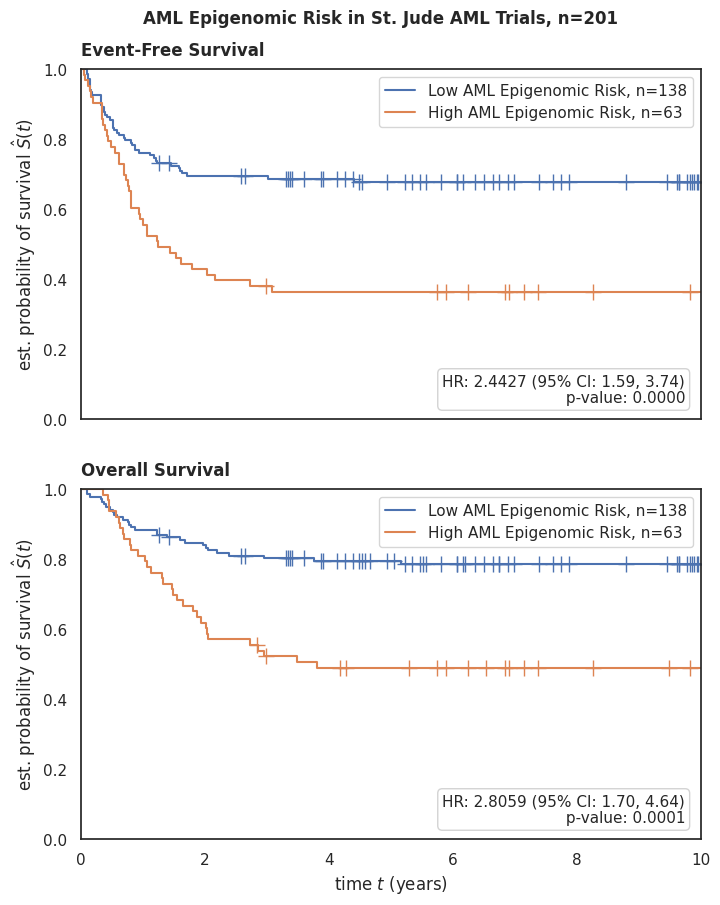

In [7]:

for dataset, trial in zip([df_cog, df_test], 
                          ['COG AML Trials', 'St. Jude AML Trials']):
    draw_kaplan_meier(model_name=model_name,
                        df=dataset,
                        save_survival_table=False,
                        save_plot=False,
                        show_ci=False,
                        add_risk_counts=False,
                        trialname=trial)

#### Per risk group

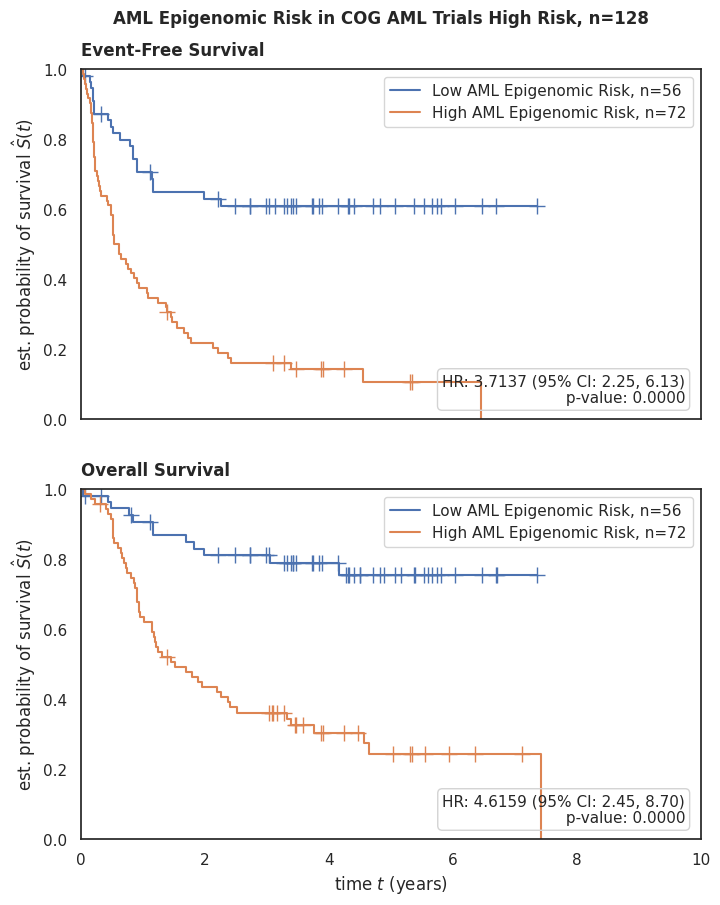

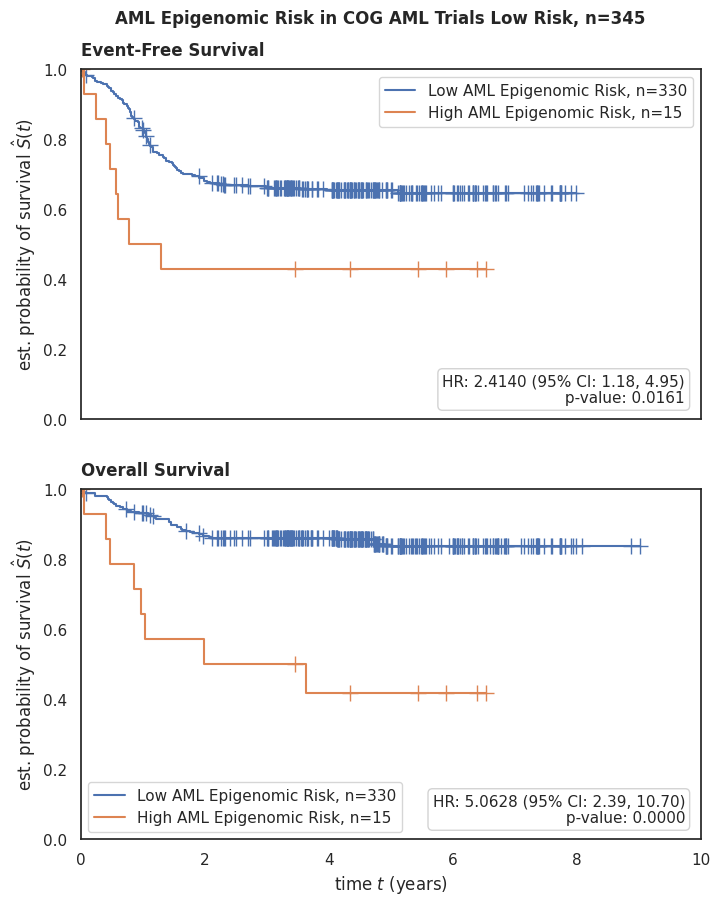

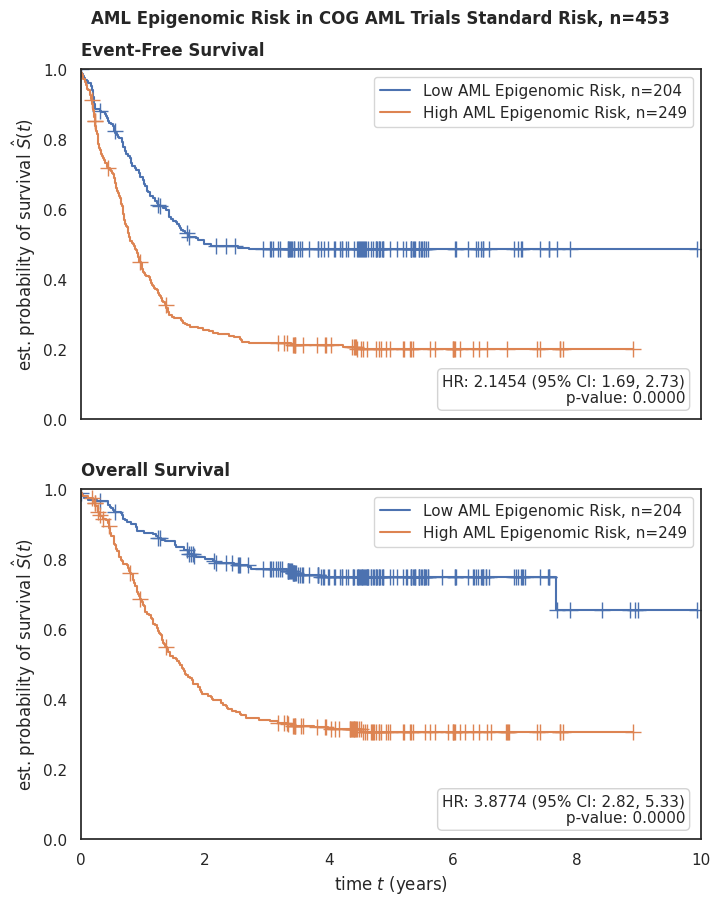

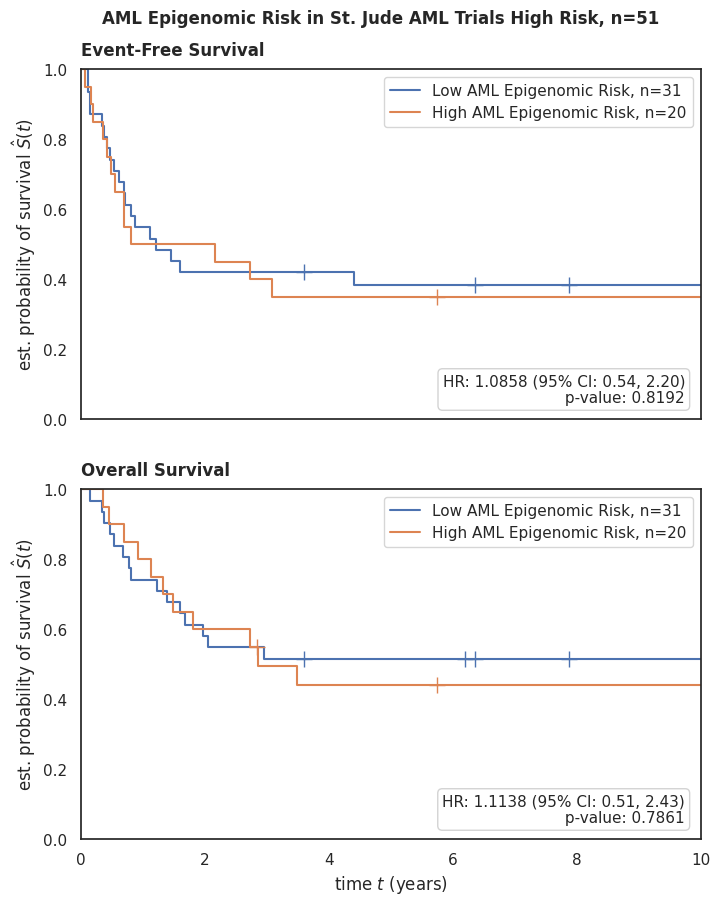

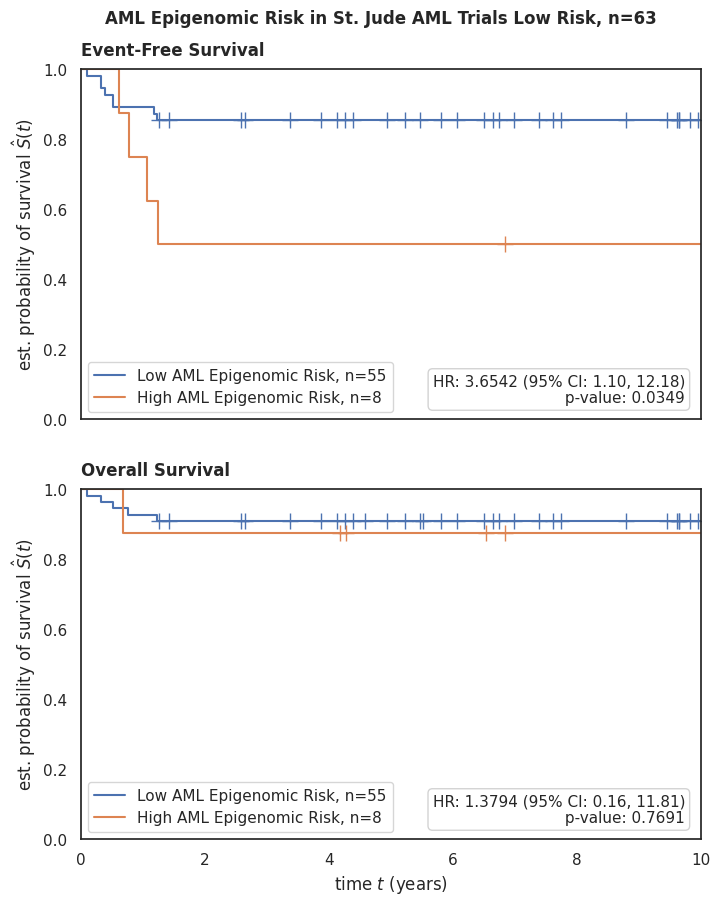

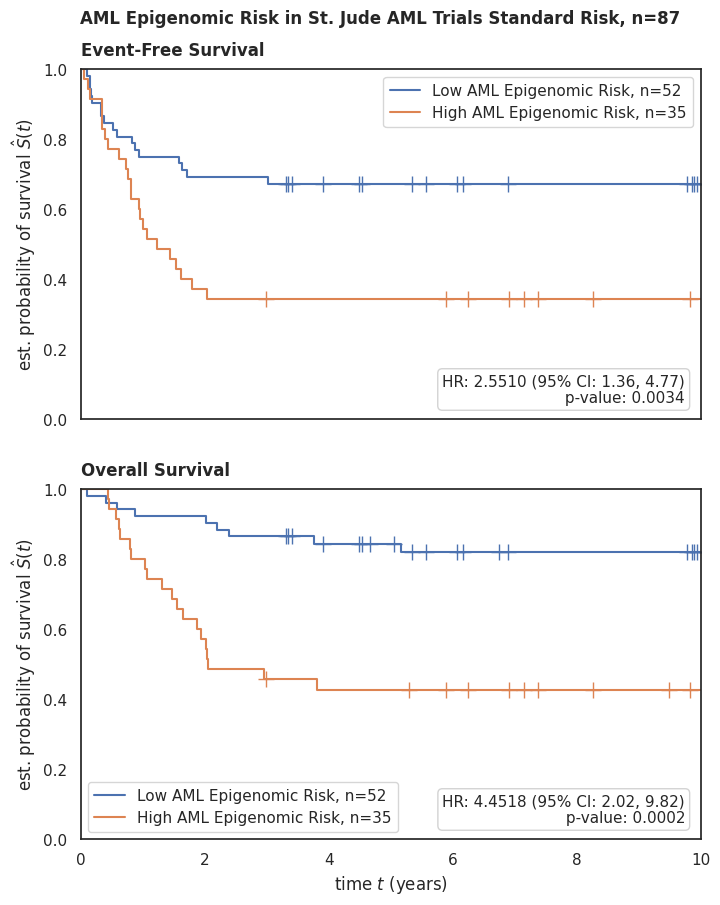

In [8]:
for dataset, trial in zip([df_cog, df_test], 
                          ['COG AML Trials', 'St. Jude AML Trials']):
    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group'] == 'High Risk'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' High Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group'] == 'Low Risk'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Low Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group'] == 'Standard Risk'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Standard Risk')

#### Per risk group (AAML1831 COG)

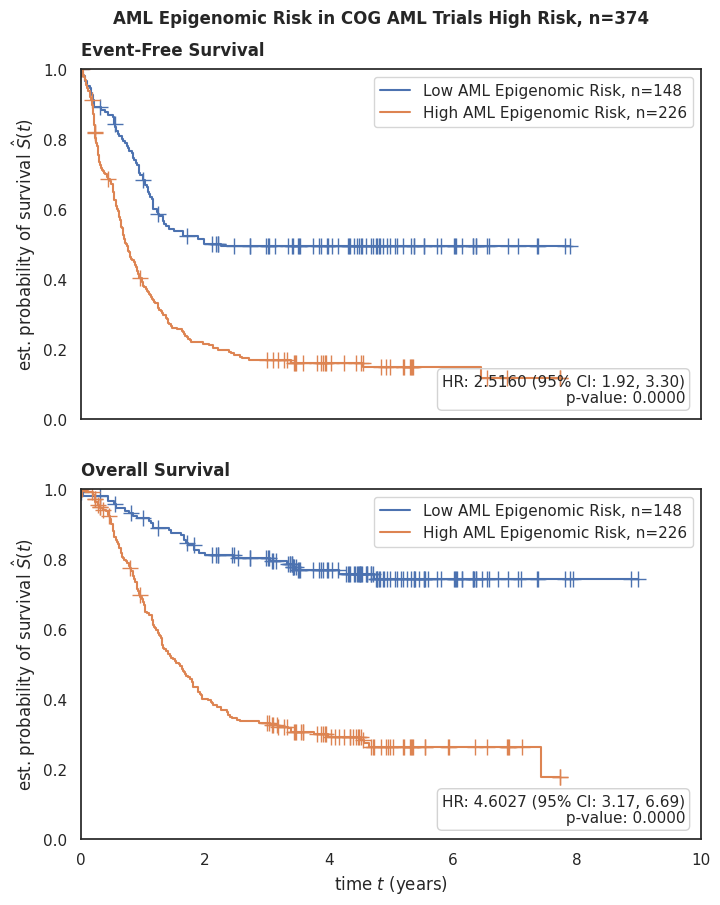

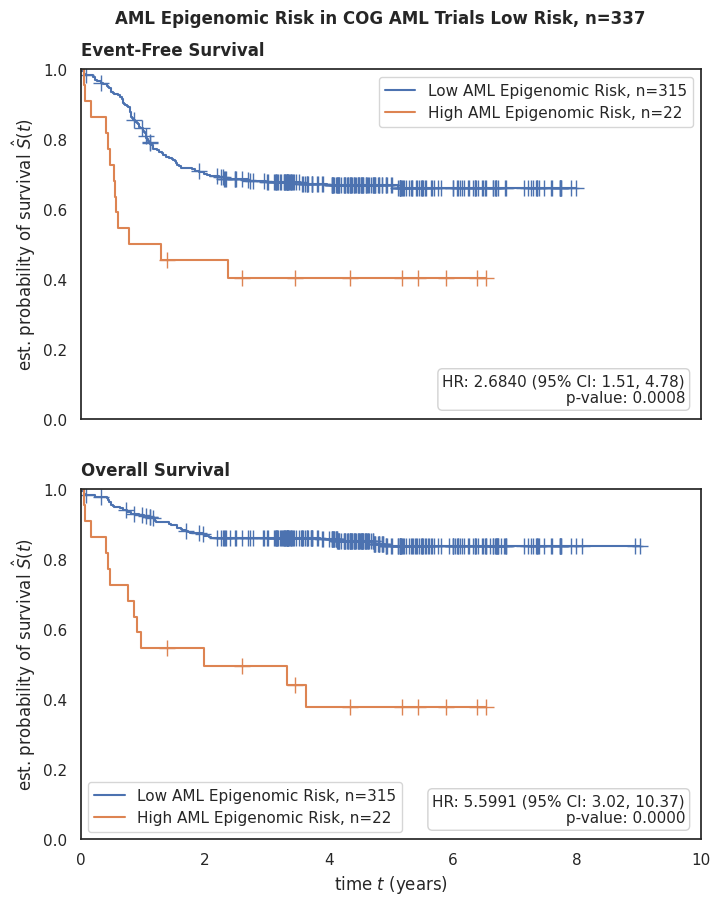

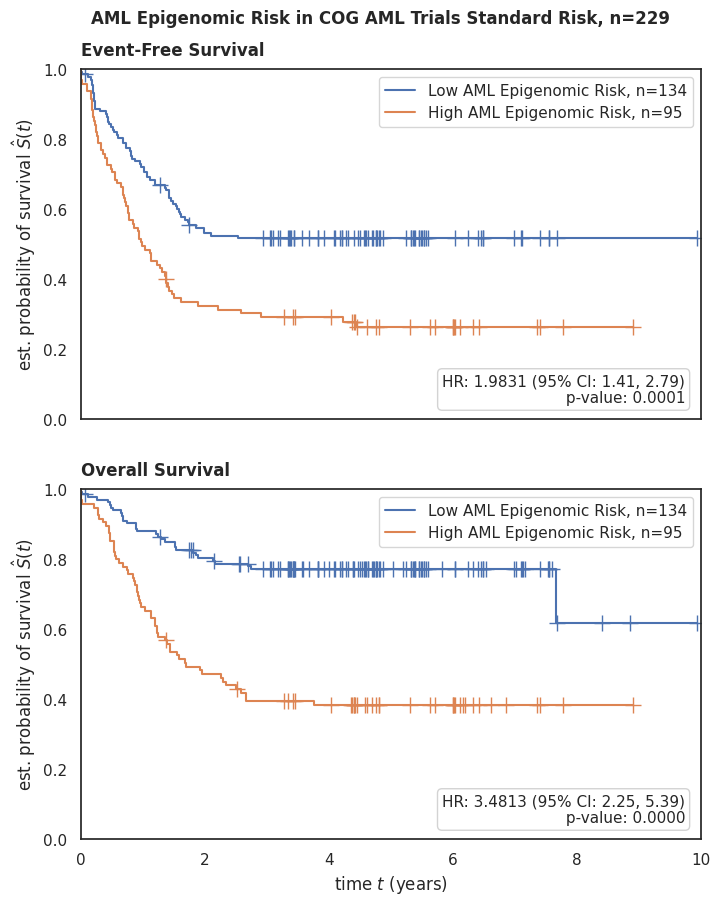

In [9]:
for dataset, trial in zip([df_cog], 
                          ['COG AML Trials']):
    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group AAML1831'] == 'High'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' High Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group AAML1831'] == 'Low'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Low Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group AAML1831'] == 'Standard'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Standard Risk')

### Forest Plots

#### With MRD 1 and BM blast (%)

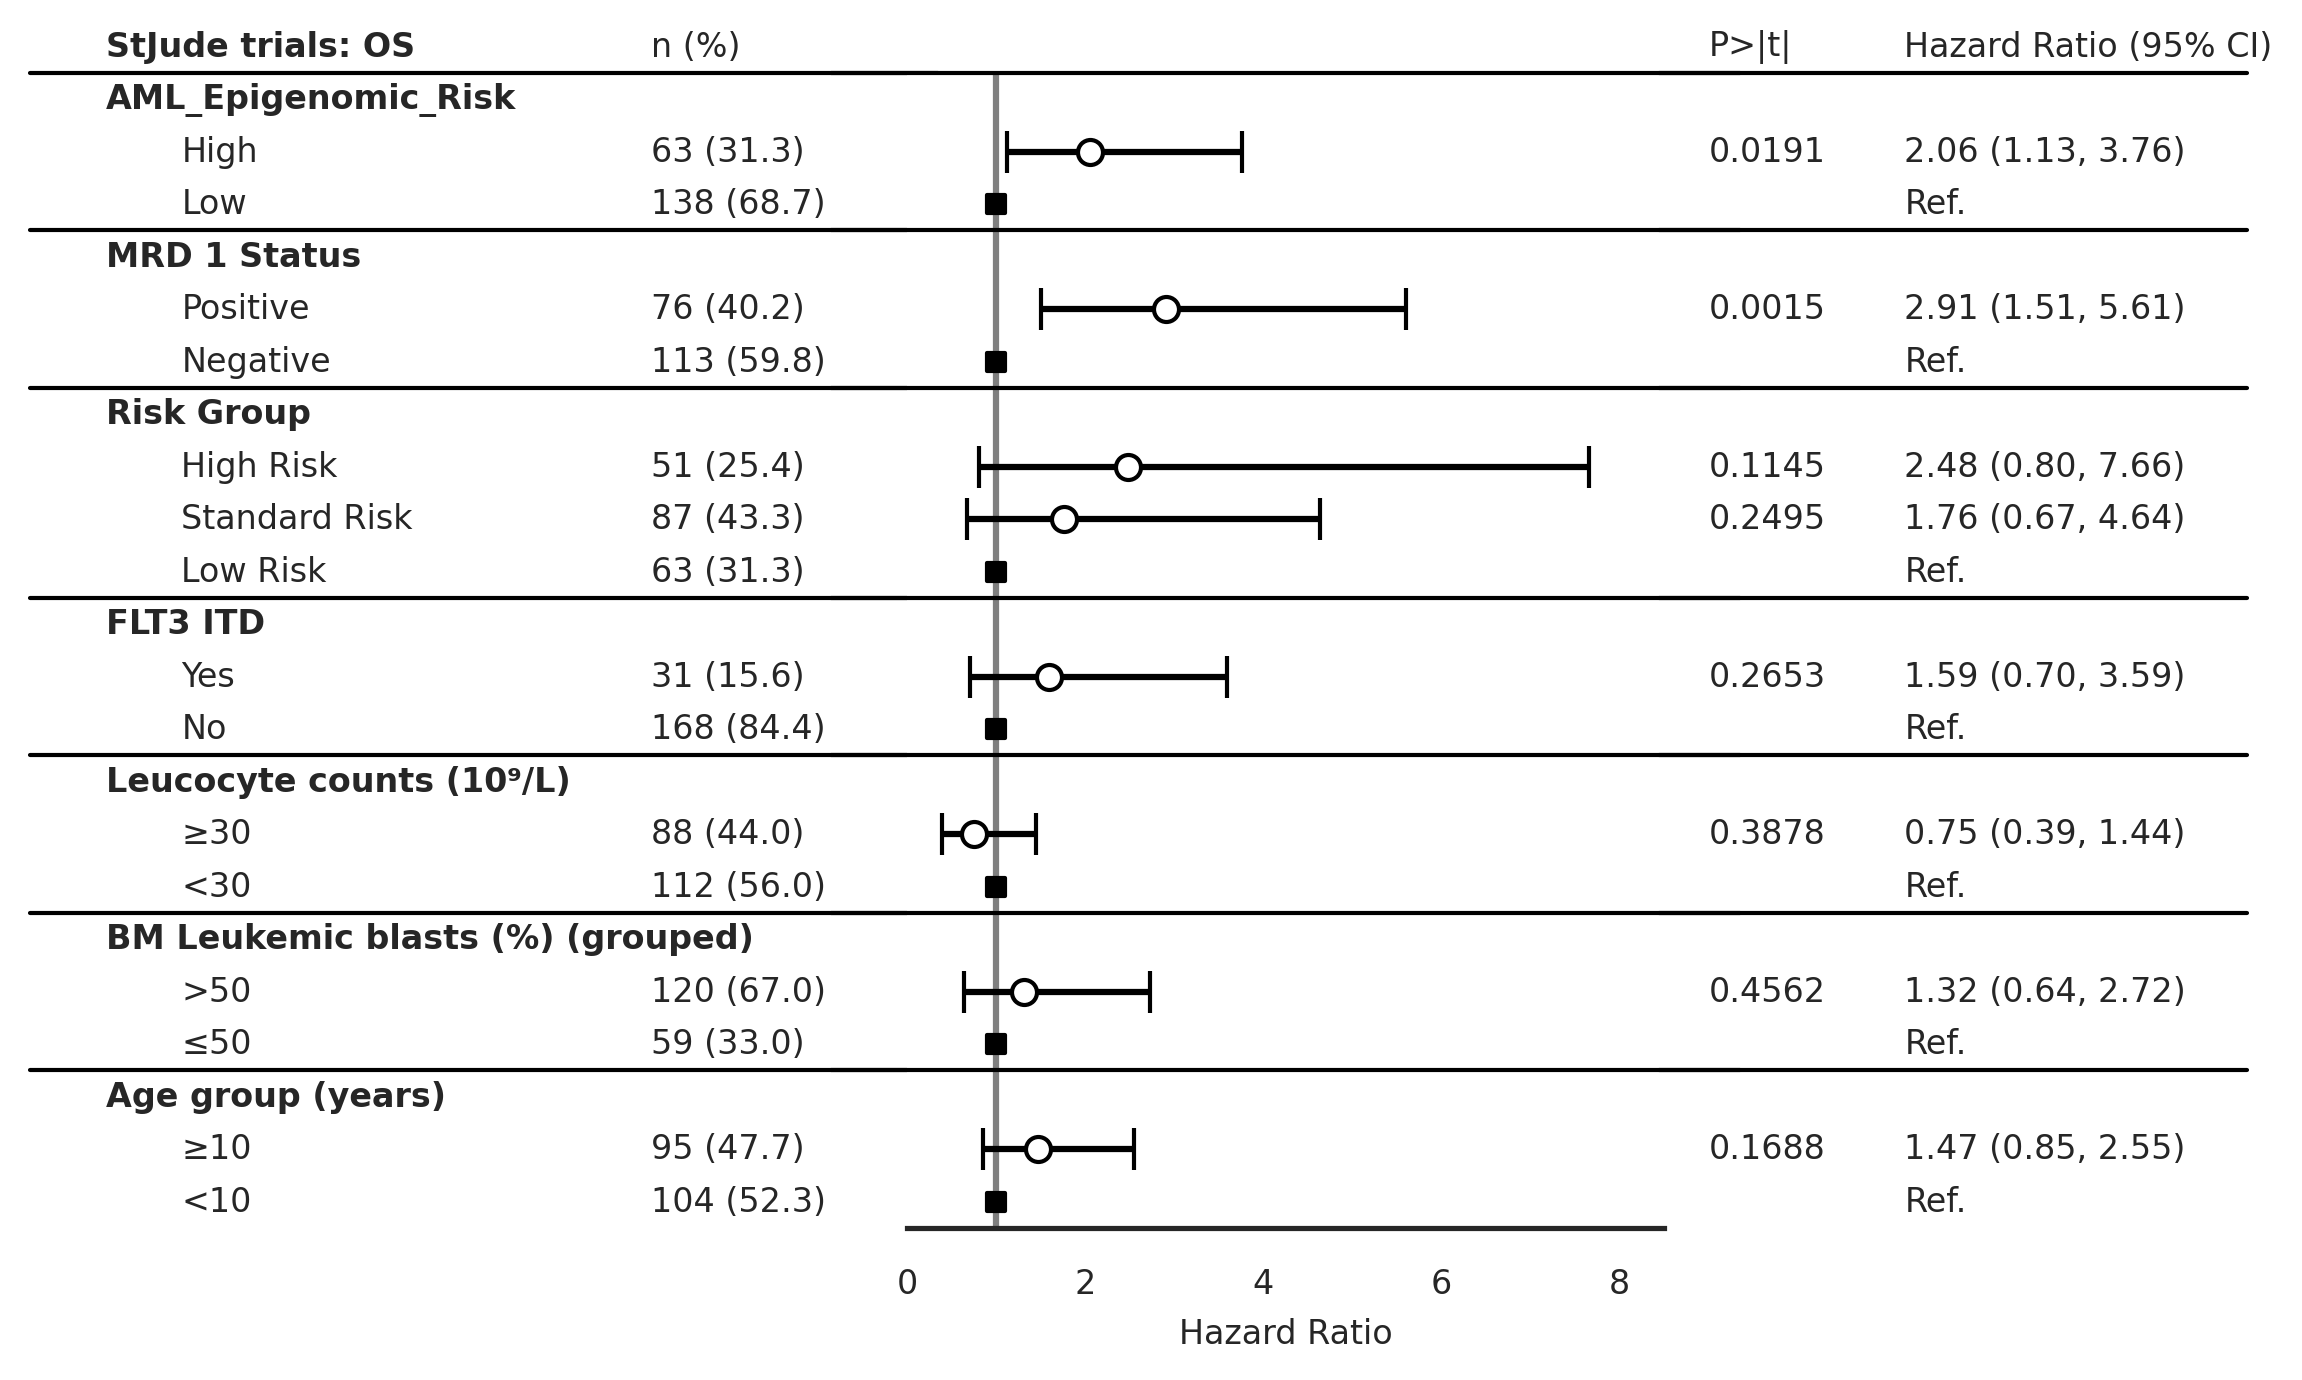

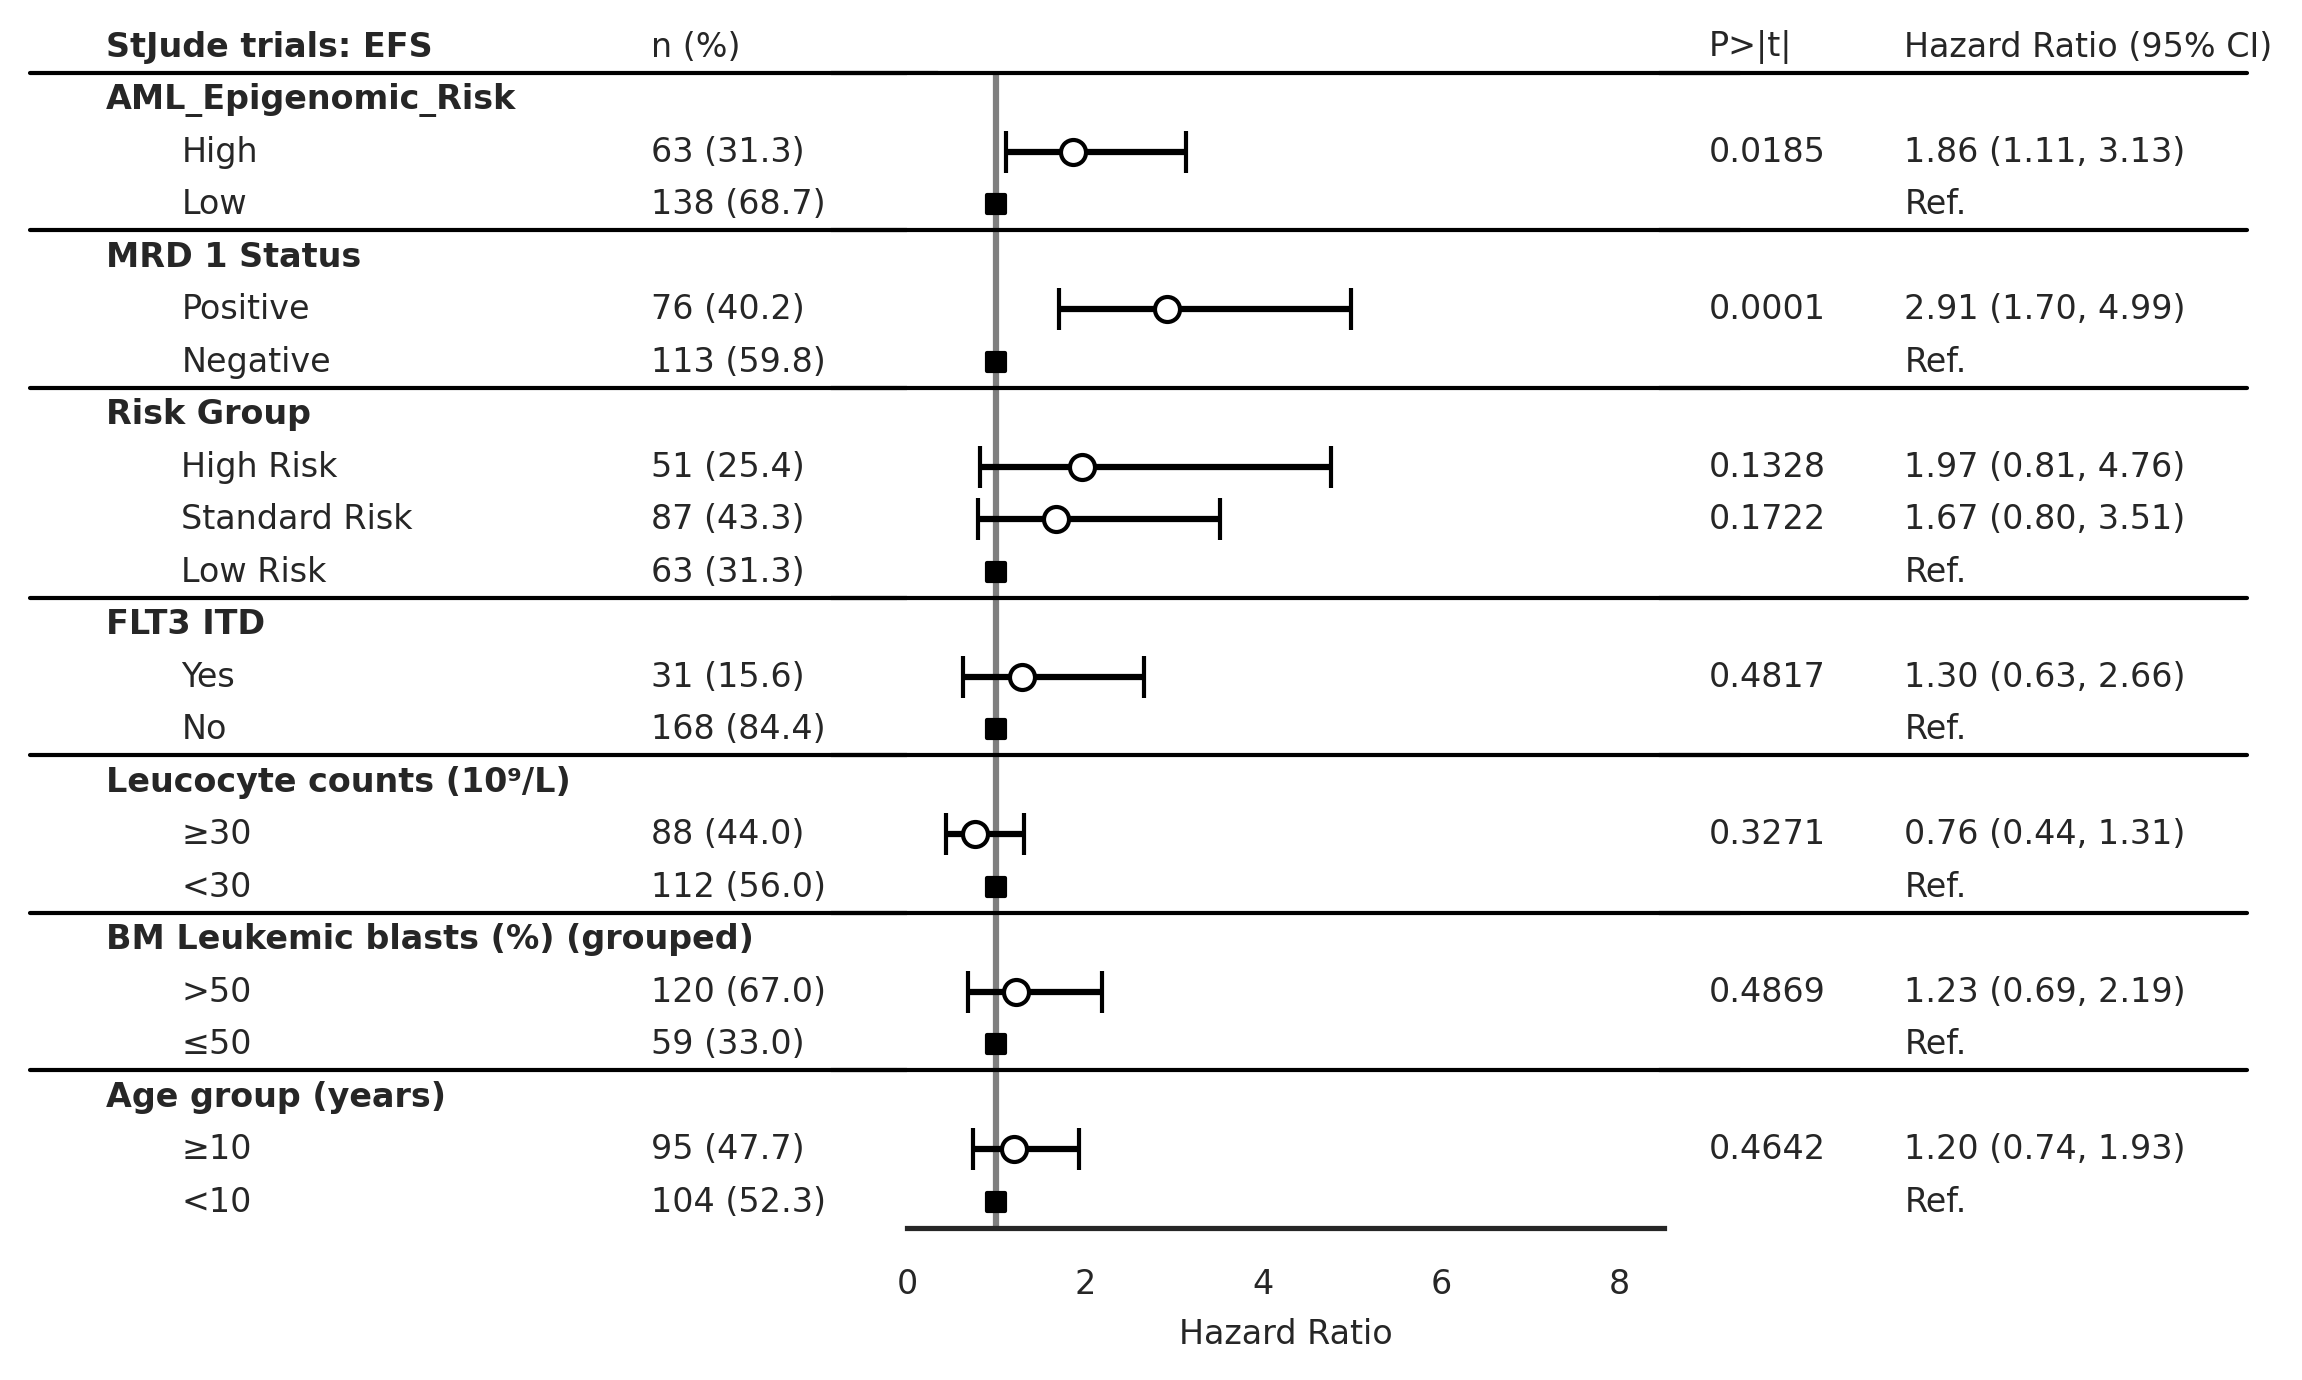

In [13]:
df_test['BM leukemic blasts (%)'] = pd.cut(df['BM Leukemic blasts (%)'], bins=[0,50,100], labels=['≤50', '>50'])

df_test['AML_Epigenomic_Risk'] = df_test['AML Epigenomic Risk'] 

draw_forest_plot_withBMblast(time='os.time',
                    event='os.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

draw_forest_plot_withBMblast(time='efs.time',
                    event='efs.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)


#### With MRD 1 without BM blast (%)

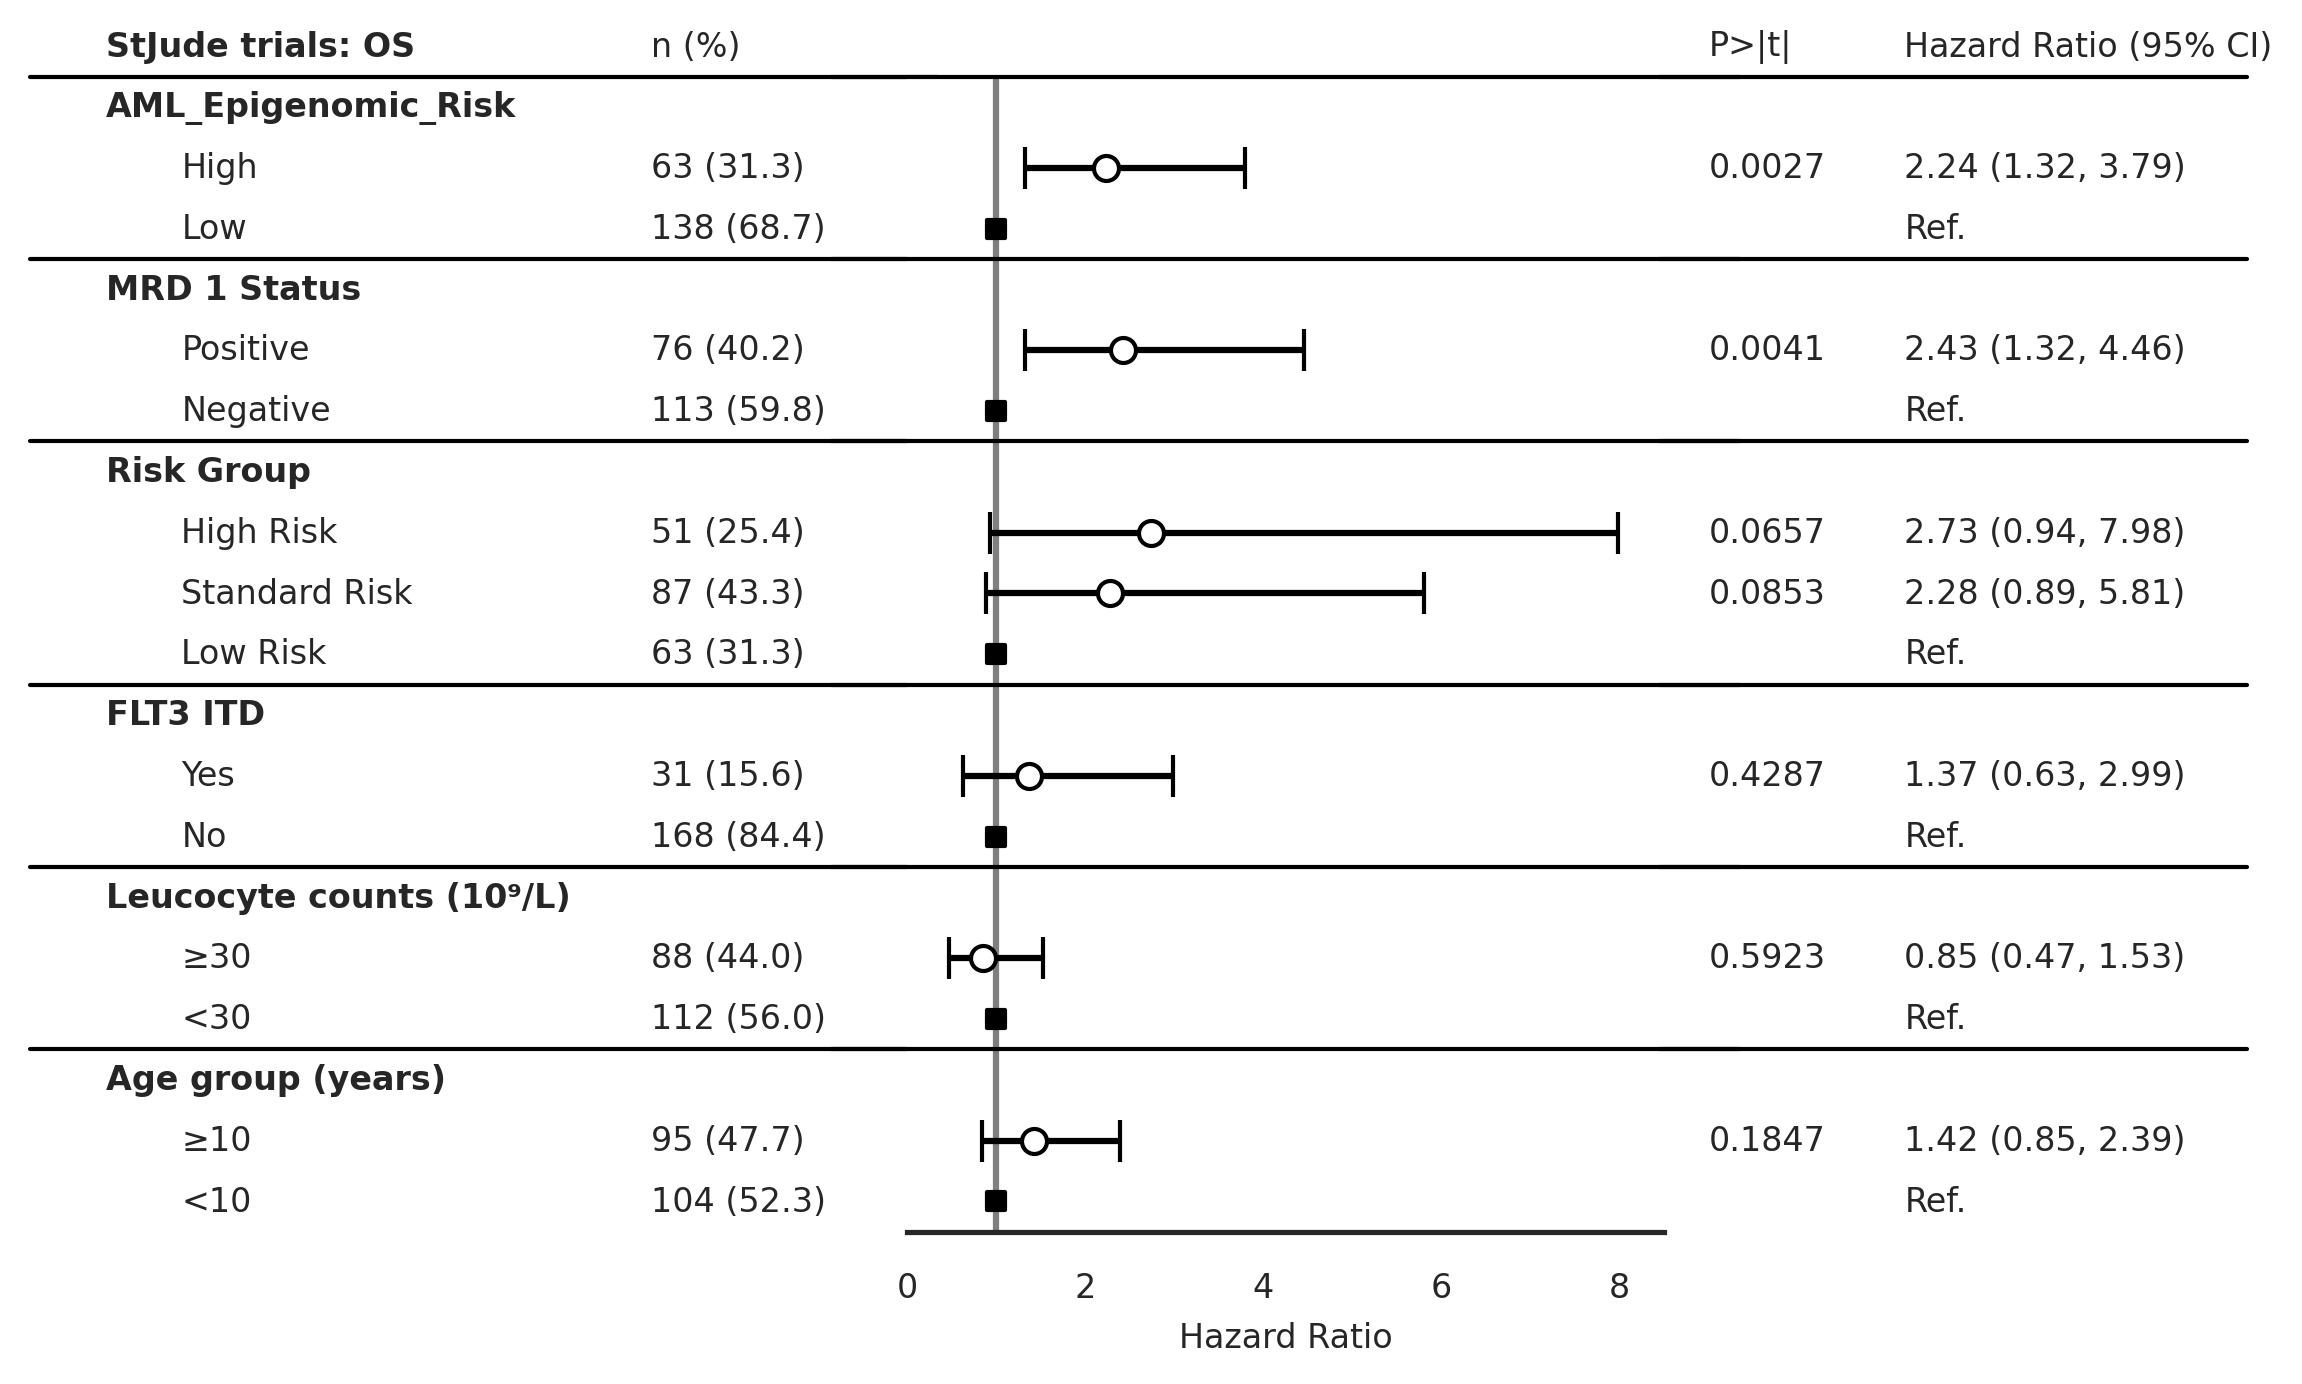

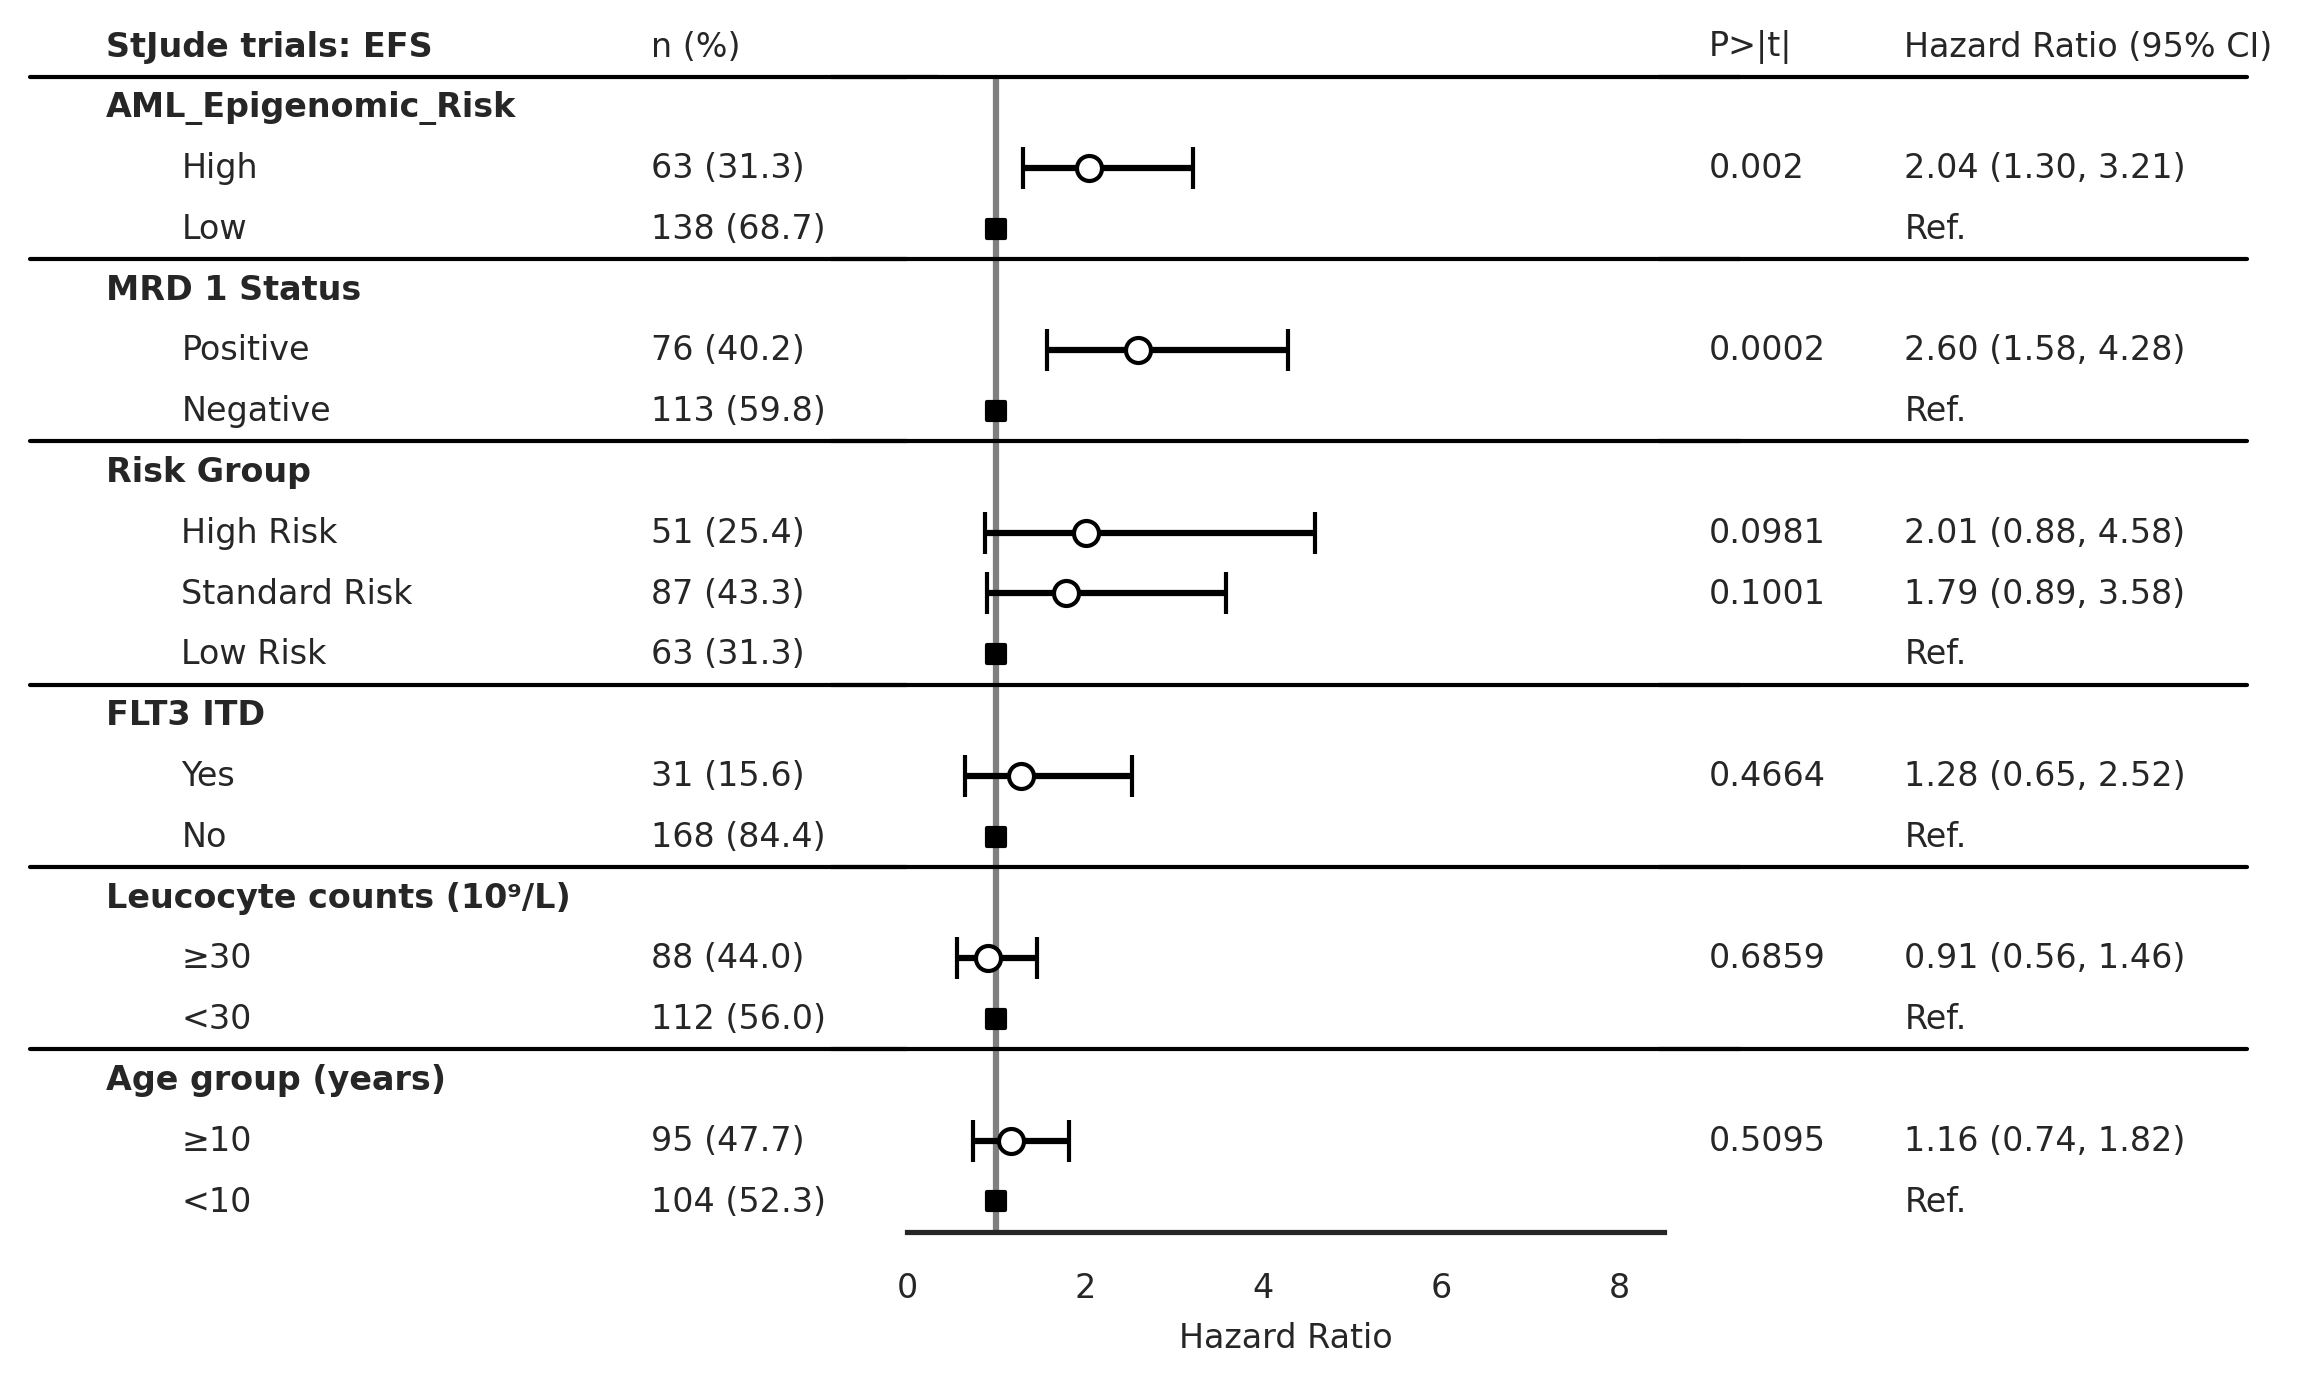

In [14]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

#### Without MRD 1

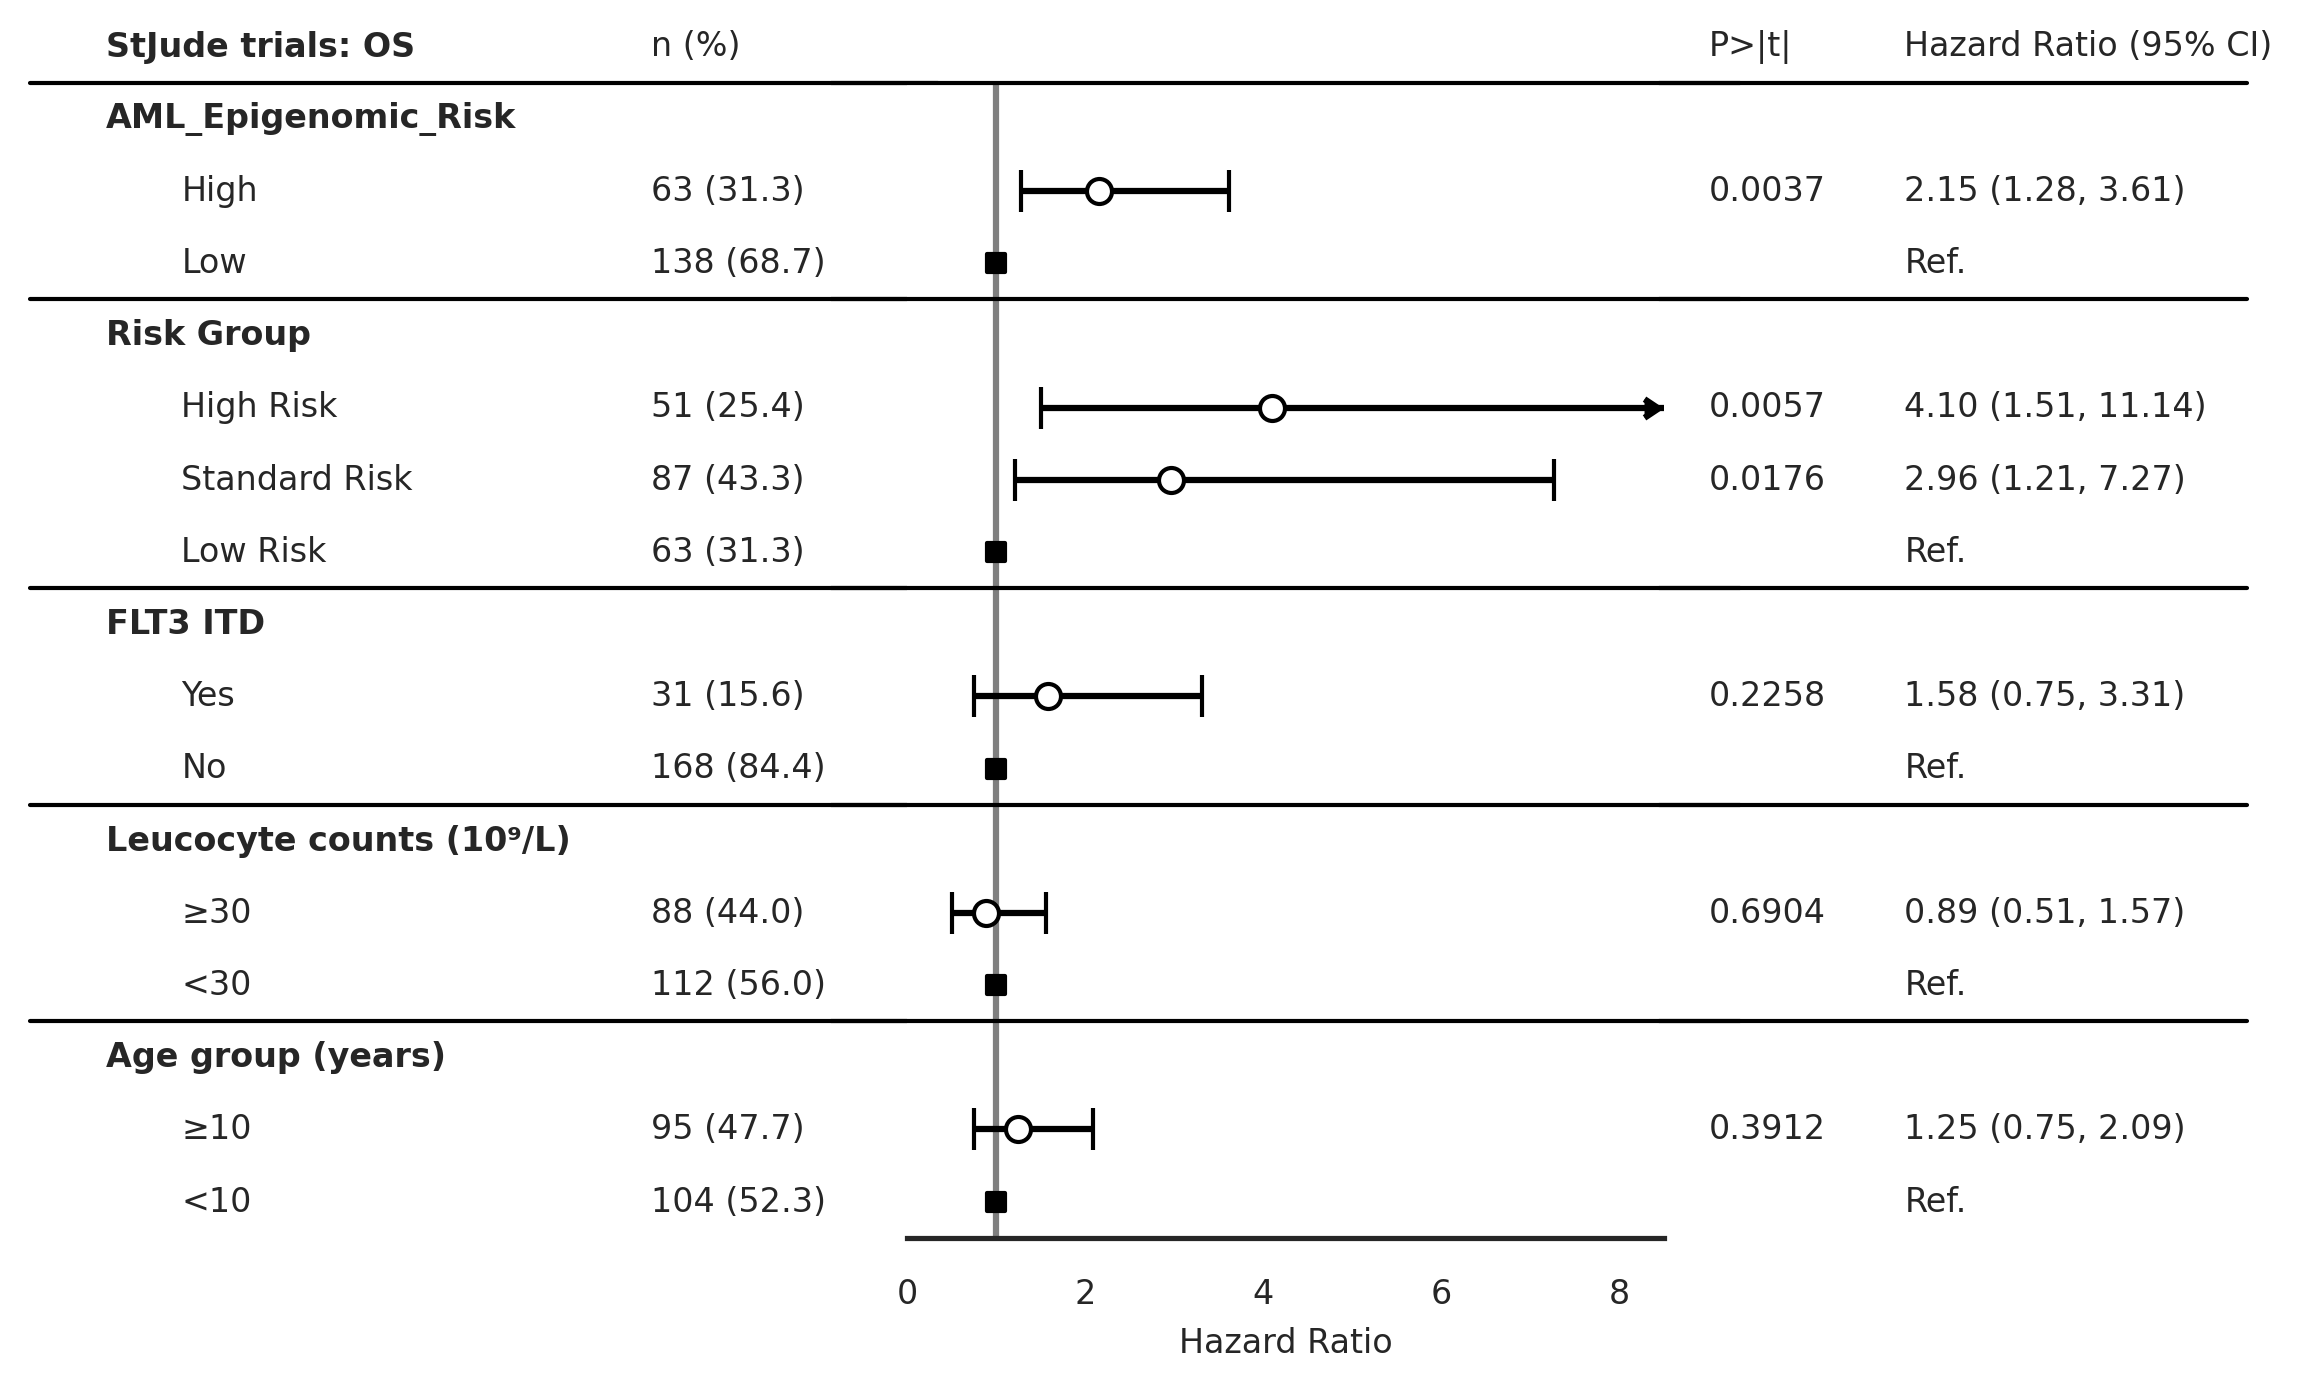

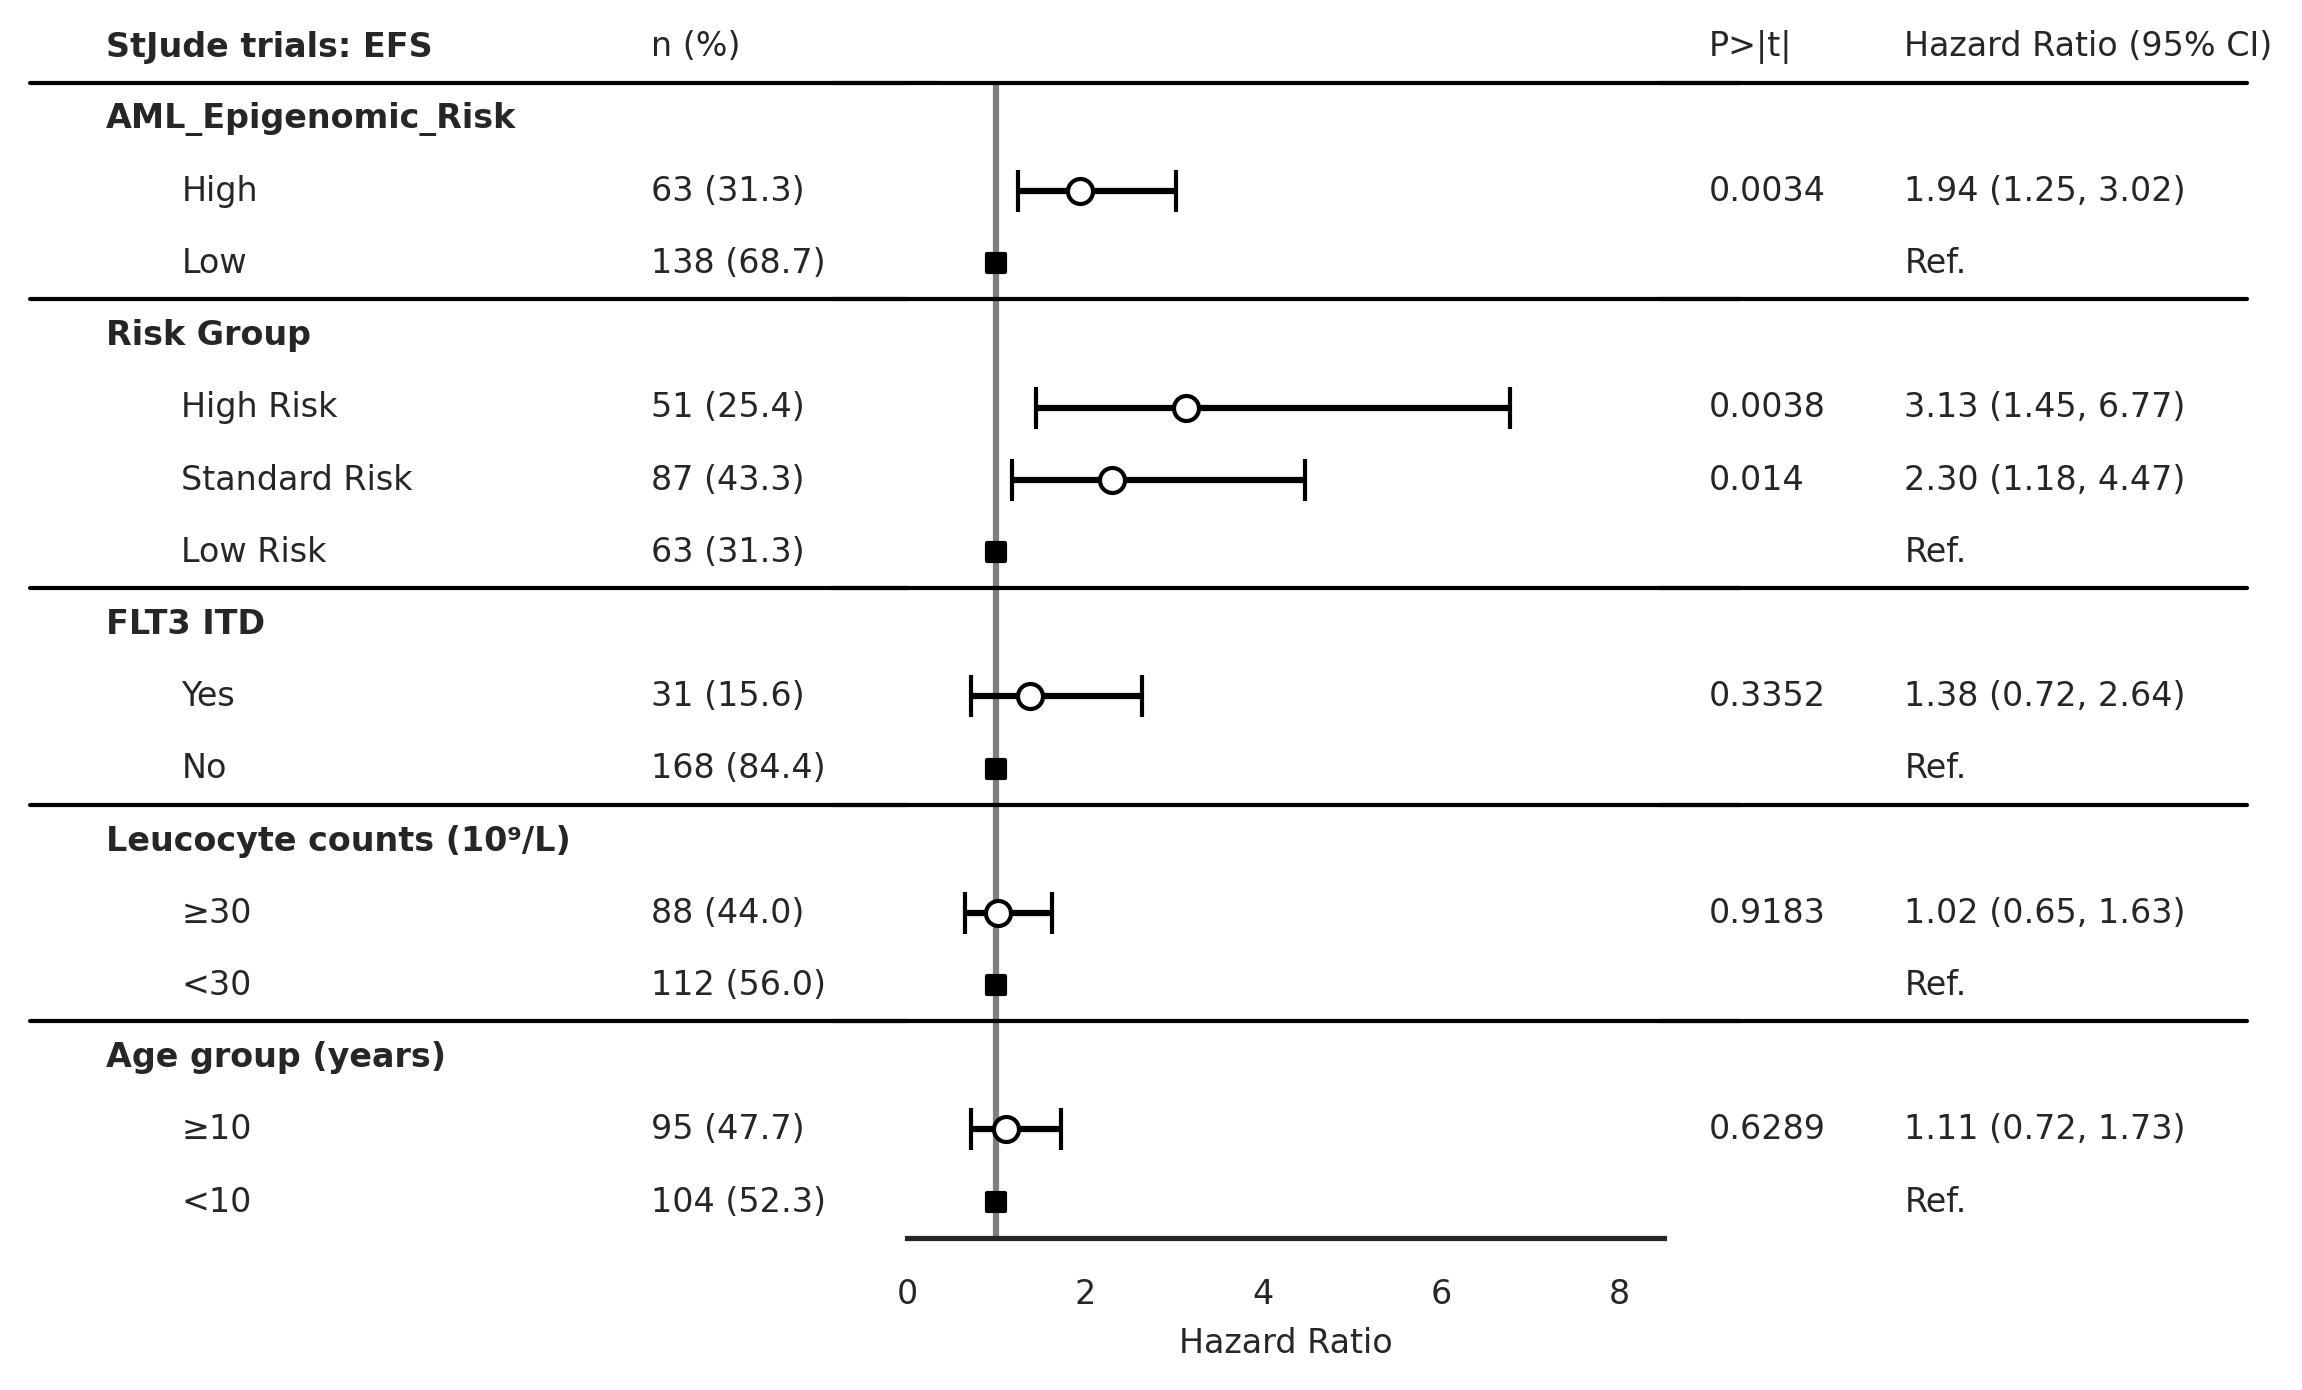

In [15]:
draw_forest_plot_noMRD(time='os.time',
                    event='os.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

draw_forest_plot_noMRD(time='efs.time',
                    event='efs.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

### ROC AUC

In [92]:
# Train datasets
p1 = plot_roc_auc(df_cog2, 'os.evnt', title='COG AML Trials')
p2 = plot_roc_auc(df_test2, 'os.evnt', title='Validation Trials')
p3 = plot_roc_auc(df_cog2, 'os.evnt', title='COG AML Trials')

# Test datasets
p4 = plot_roc_auc(df_cog2, 'os.evnt', title='COG AML Trials')
p5 = plot_roc_auc(df_test2, 'os.evnt', title='Validation Trials')
p6 = plot_roc_auc(df_cog2, 'os.evnt', title='COG AML Trials')

p = gridplot([[p1, p2, p3], [p4,p5, p6]], toolbar_location='above')

show(p)

### Box Plots

In [ ]:
draw_boxplot(df=df_test,x='Risk Group', y='P(Dead)',
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

draw_boxplot(df=df_test,x='MRD 1 Status', y='P(Dead)',
                order=['Positive','Negative'],
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

draw_boxplot(df=df_test,x='Primary Cytogenetic Code', y='P(Dead)',
                order='auto',
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

### Stacked Bar Plots

In [ ]:
draw_stacked_barplot(df=validation_clinical_data,x='MRD 1 Status', y=score_name,
             order=['Positive','Negative'],
             trialname='StJude trials', hue=score_name + ' Categorical',
             save_plot=False, figsize=None)

draw_stacked_barplot(df=validation_clinical_data,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='StJude trials', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=9)

draw_stacked_barplot(df=validation_clinical_data,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='StJude trials', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=6)



### Patient Characteristics Table

#### Overall study population

In [ ]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD','Treatment Arm']

validation_clinical_data['Age (years)'] = validation_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(validation_clinical_data, columns,
                        overall=False, missing=True,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']})

mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_validation_cohort.csv')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','Validation Cohort'])

#### Including both discovery and validation cohorts

In [ ]:
# Load clinical data
discovery_clinical_data = pd.read_csv(input_path+'discovery_clinical_data.csv',
                                      low_memory=False, index_col=0)

discovery_clinical_data['Age (years)'] = discovery_clinical_data['Age (years)'].astype(float)

px = discovery_clinical_data.loc[ewas_top_cpgs.index]

dx = discovery_clinical_data
# [~discovery_clinical_data['ELN 2022 Diagnosis'].isin(['Mixed phenotype acute leukemia T/myeloid',
#                                        'Myeloid leukaemia associated with Down syndrome',
#                                        'AML with t(9;22)(q34.1;q11.2)/BCR::ABL1'])]
dx = dx[~dx['WHO 2022 Diagnosis'].isna()]

# Use only samples from df_index
dx = dx[dx.index.isin(pd.read_csv(output_path+'pacmap_output/pacmap_5d_output_acute_leukemia.csv', index_col=1).index)]

# join discovery clinical data with validation clinical data
all_cohorts = pd.concat([dx, px, validation_clinical_data],
                         axis=0, keys=['MethylScoreAML Dx Discovery','MethylScoreAML Px Discovery' ,'Validation'],
                         names=['cohort']).reset_index()


columns = ['Age group (years)','Sex', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD', 'Treatment Arm','Clinical Trial']

mytable_cog = TableOne(all_cohorts, columns,
                        overall=False, missing=False,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                                groupby='cohort')

mytable_cog.to_excel('../data/tableone_both_cohorts.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        # headers=[score_name,"",score_name,'Validation','p-value','Statistical Test']
)

#### By MethylScore category

In [ ]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD']

validation_clinical_data['Age (years)'] = validation_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(validation_clinical_data, columns,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby=score_name + ' Categorical')

mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_validation_methylscoreaml_px.csv')
mytable_cog.to_excel('../data/tableone_validation_methylscoreaml_px.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

## Watermark

In [ ]:
%load_ext watermark

In [ ]:
# watermark with all libraries used in this notebook
%watermark -v -p pandas,seaborn,matplotlib,tableone,sklearn,lifelines,statannotations -a Francisco_Marchi@Lamba_Lab_UF -d -m